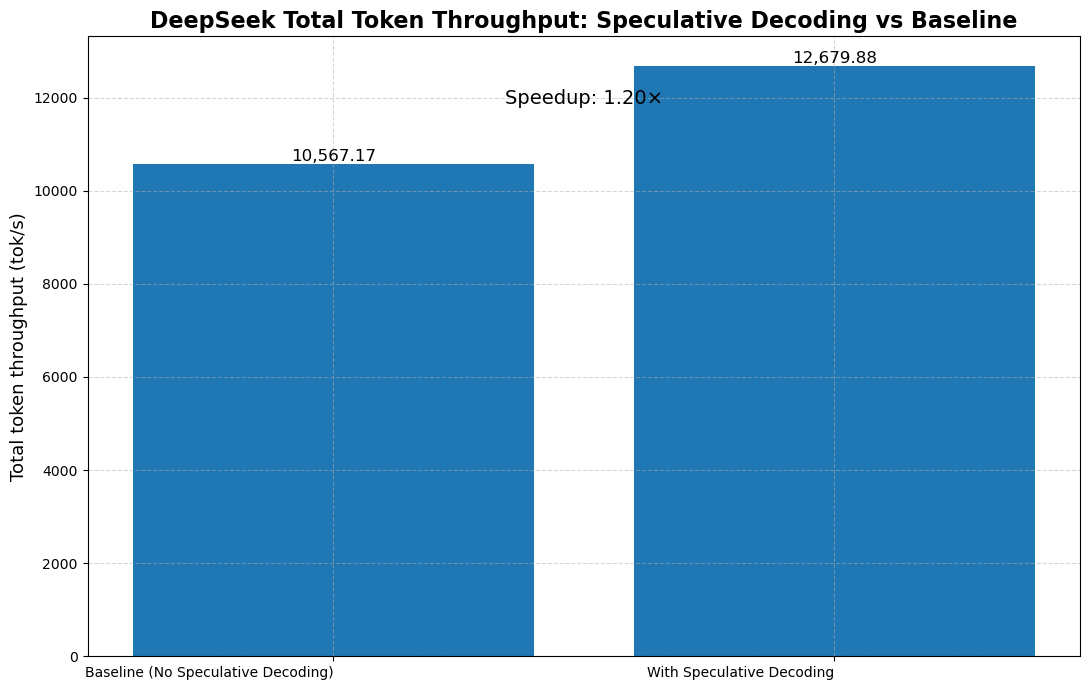

In [3]:
# Create a simple comparison plot for Total token throughput (tok/s)
import matplotlib.pyplot as plt
import pandas as pd
# from caas_jupyter_tools import display_dataframe_to_user

# Data parsed from the user's message
data = [
    {"Label": "Baseline (No Speculative Decoding)", "Speculative Decoding": "No", "Total token throughput (tok/s)": 10567.17, "Request throughput (req/s)": 20.81, "Benchmark duration (s)": 96.09},
    {"Label": "With Speculative Decoding", "Speculative Decoding": "Yes", "Total token throughput (tok/s)": 12679.88, "Request throughput (req/s)": 24.97, "Benchmark duration (s)": 80.08},
]

df = pd.DataFrame(data)

# Compute speedup
baseline = df.loc[df["Speculative Decoding"] == "No", "Total token throughput (tok/s)"].iloc[0]
spec = df.loc[df["Speculative Decoding"] == "Yes", "Total token throughput (tok/s)"].iloc[0]
speedup = spec / baseline

# Show the data in a small table for reference
# display_dataframe_to_user("DeepSeek throughput comparison", df)

# Plot
plt.figure(figsize=(11, 7))
plt.title("DeepSeek Total Token Throughput: Speculative Decoding vs Baseline", fontsize=16, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)

labels = df["Label"].tolist()
values = df["Total token throughput (tok/s)"].tolist()

bars = plt.bar(labels, values)
plt.ylabel("Total token throughput (tok/s)", fontsize=13)
plt.xticks(rotation=0, ha="right")

# Annotate exact values on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{val:,.2f}", ha='center', va='bottom', fontsize=12)

# Add a text box with speedup
plt.text(0.5, 0.9, f"Speedup: {speedup:.2f}×", transform=plt.gca().transAxes, ha="center", va="center", fontsize=14)

# Save outputs
# png_path = "/mnt/data/deepseek_speculative_vs_baseline_throughput.png"
# pdf_path = "/mnt/data/deepseek_speculative_vs_baseline_throughput.pdf"
plt.tight_layout()
# plt.savefig(png_path, dpi=220, bbox_inches="tight")
# plt.savefig(pdf_path, bbox_inches="tight")
plt.show()

# png_path, pdf_path, speedup
# 

                               Config  Total token throughput (tok/s)
0  Baseline (No Speculative Decoding)                        10567.17
1           With Speculative Decoding                        12679.88


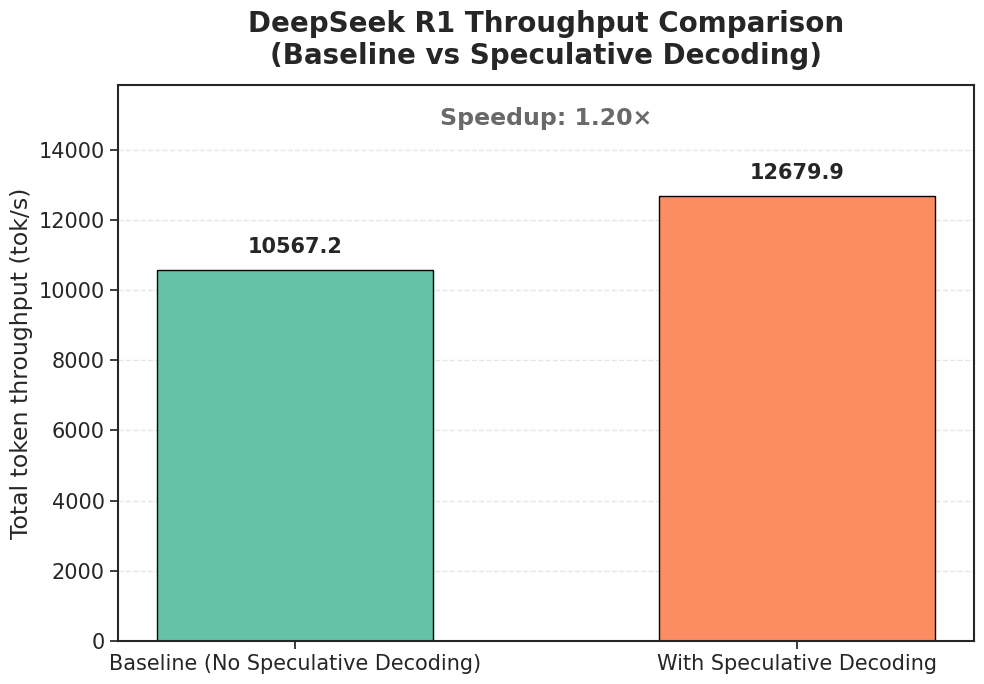

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# -----------------------------
# Seaborn style and palette
# -----------------------------
palette = sns.color_palette('Set2')
sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

colors = sns.color_palette()

# -----------------------------
# Data
# -----------------------------
labels = ["Baseline (No Speculative Decoding)", "With Speculative Decoding"]
x = np.arange(len(labels))
throughput = np.array([10567.17, 12679.88])

# Compute speedup
speedup = throughput[1] / throughput[0]

df = pd.DataFrame({
    "Config": labels,
    "Total token throughput (tok/s)": throughput,
})
print(df)

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 7))

bars = ax.bar(x, throughput, color=[colors[0], colors[1]], edgecolor='black', width=0.55)

# -----------------------------
# Axis and title styling
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha="center", fontsize=16)
ax.set_ylabel("Total token throughput (tok/s)", fontsize=17)
ax.set_title("DeepSeek R1 Throughput Comparison\n(Baseline vs Speculative Decoding)",
             fontsize=20, fontweight="bold", pad=15)
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.set_ylim(0, max(throughput) * 1.25)

# -----------------------------
# Annotate bars
# -----------------------------
for i, val in enumerate(throughput):
    ax.text(i, val + max(throughput) * 0.03, f"{val:.1f}", ha="center", va="bottom", fontsize=15, fontweight="bold")

# Show speedup annotation
ax.text(0.5, max(throughput) * 1.15, f"Speedup: {speedup:.2f}×",
        ha="center", va="bottom", fontsize=17, color="dimgray", fontweight="bold")

# -----------------------------
# Spine and ticks
# -----------------------------
ax.tick_params(axis='both', which='major', labelsize=15)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# -----------------------------
# Layout and export
# -----------------------------
fig.tight_layout()
plt.savefig("deepseek_specdec_set2_largefont.png", dpi=220, bbox_inches="tight")
plt.savefig("deepseek_specdec_set2_largefont.pdf", bbox_inches="tight")
plt.show()


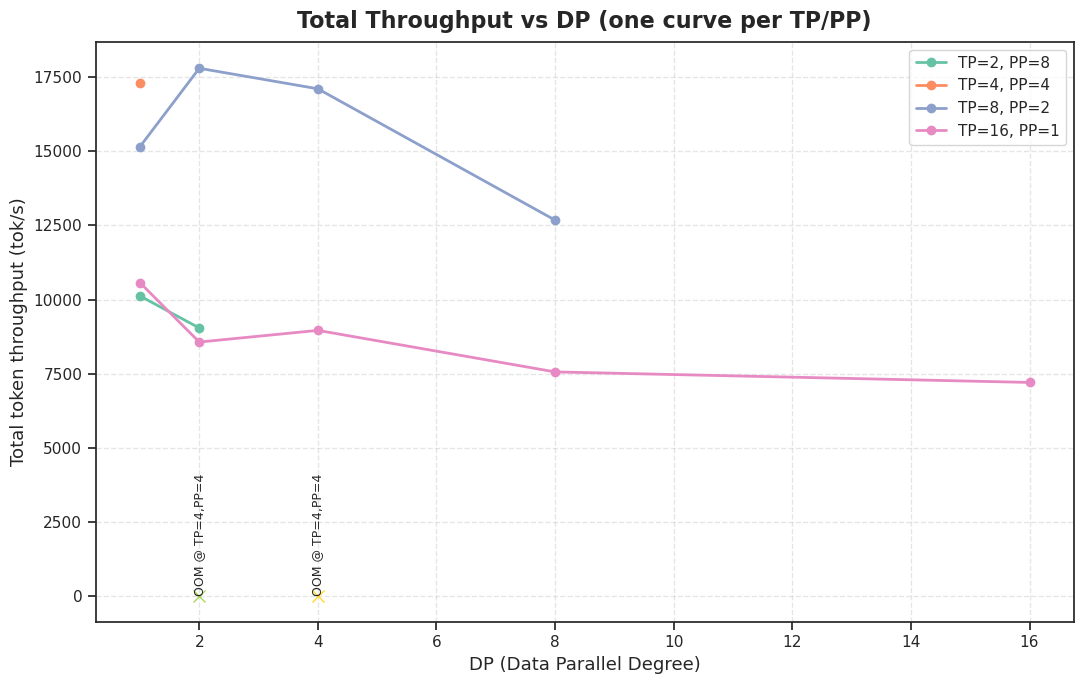

/tmp/ipykernel_4124628/457997759.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(best_sorted["Label"], rotation=20, ha="right")


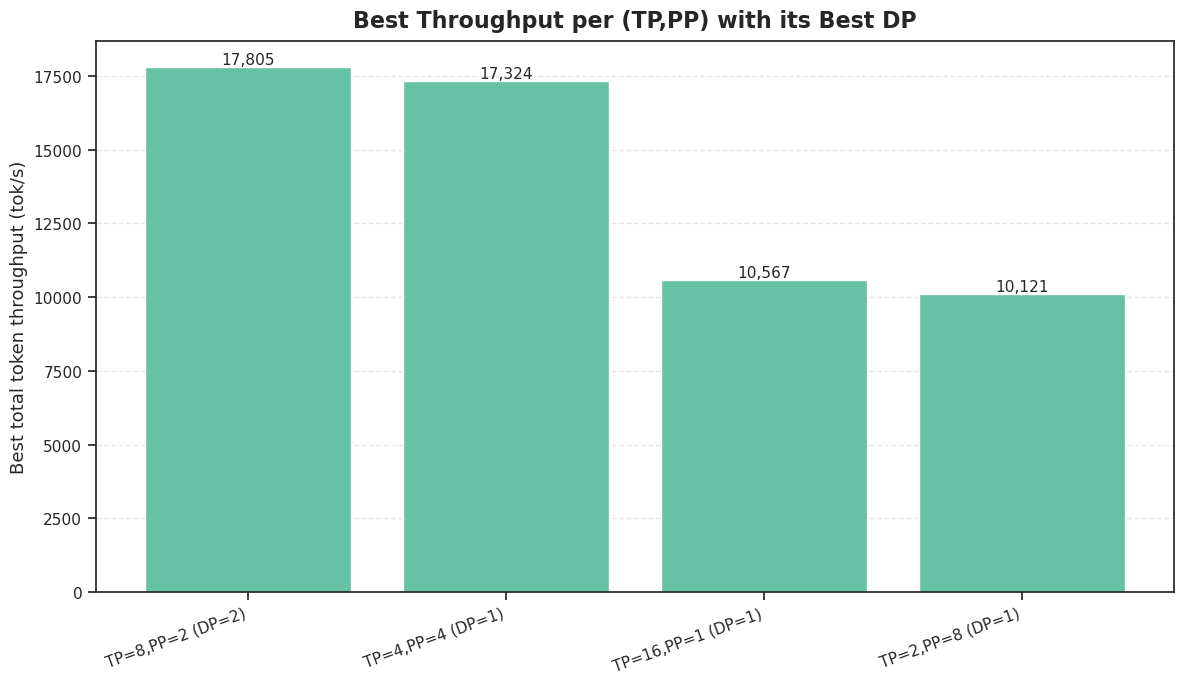

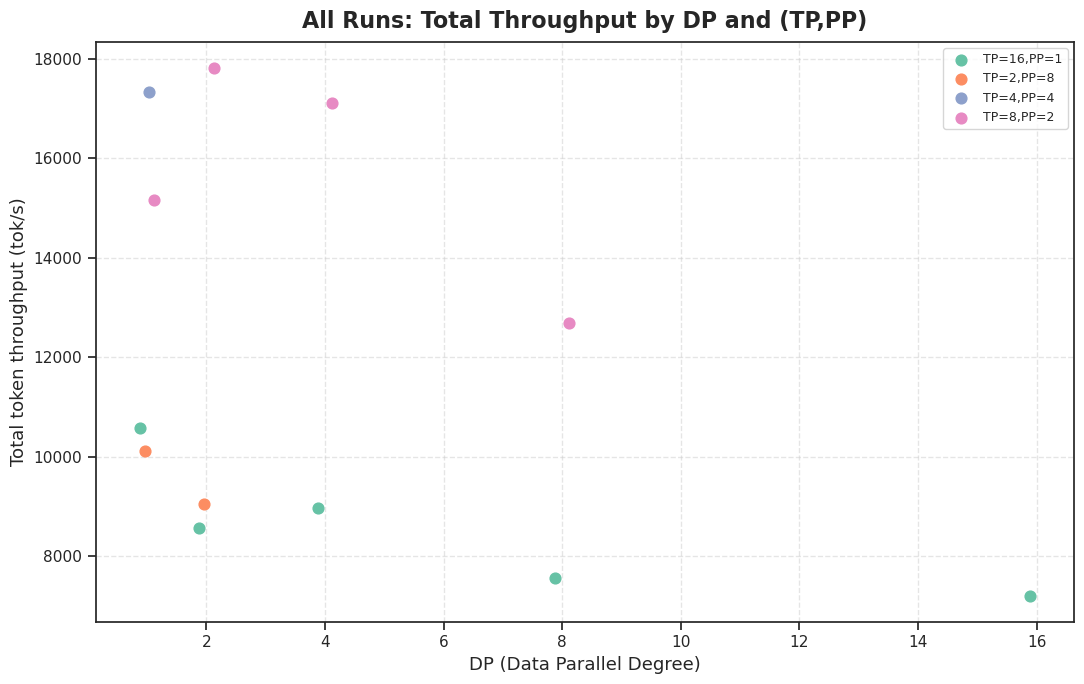

In [11]:
# Parse the user's benchmark results and plot Total token throughput (tok/s)
# NOTE: Using matplotlib only (no seaborn), one chart per figure, and no explicit colors.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from caas_jupyter_tools import display_dataframe_to_user

# -----------------------------
# Raw data entered from user
# -----------------------------
rows = [
    # (TP, PP, DP, total_throughput, note)
    (2, 8, 1, 10121.05, ""),
    (16, 1, 1, 10567.17, ""),
    (2, 8, 2, 9039.90, ""),
    (16, 1, 2, 8566.00, ""),
    (4, 4, 1, 17324.45, ""),
    (16, 1, 4, 8959.44, ""),
    (4, 4, 2, None, "CUDA OOM"),
    (16, 1, 8, 7557.84, ""),
    (4, 4, 4, None, "CUDA OOM"),
    (16, 1, 16, 7202.73, ""),
    (8, 2, 1, 15159.387655088216, ""),
    (8, 2, 2, 17805.00, ""),
    (8, 2, 4, 17111.97, ""),
    (8, 2, 8, 12679.88, ""),
]

df = pd.DataFrame(rows, columns=["TP", "PP", "DP", "Total tok/s", "Note"])

# Aggregate repeated runs by taking mean and also keeping best
agg_df_mean = (
    df.dropna(subset=["Total tok/s"])
      .groupby(["TP", "PP", "DP"], as_index=False)
      .agg(**{
          "Mean tok/s": ("Total tok/s", "mean"),
          "Best tok/s": ("Total tok/s", "max"),
          "N runs": ("Total tok/s", "count"),
      })
)

# Keep OOM rows separately for annotation
oom_df = df[df["Total tok/s"].isna()]

# Display a tidy table for reference
# display_dataframe_to_user("DeepSeek throughput (grouped by TP/PP/DP)", agg_df_mean)

# -----------------------------
# Figure 1: Total throughput vs DP, one curve per (TP,PP)
# -----------------------------
fig1 = plt.figure(figsize=(11, 7))
ax1 = plt.gca()

# Build series
series = {}
for _, row in agg_df_mean.iterrows():
    key = f"TP={int(row['TP'])}, PP={int(row['PP'])}"
    series.setdefault(key, [])
    series[key].append((int(row["DP"]), float(row["Mean tok/s"])))

# Sort by DP within each series and plot
for label, points in series.items():
    points_sorted = sorted(points, key=lambda x: x[0])
    dps = [p[0] for p in points_sorted]
    vals = [p[1] for p in points_sorted]
    ax1.plot(dps, vals, marker="o", linewidth=2, label=label)

# Mark OOM points with 'x'
if not oom_df.empty:
    for _, r in oom_df.iterrows():
        ax1.plot(r["DP"], 0, marker="x", markersize=9)  # place at 0 to indicate failure
        ax1.text(r["DP"], 0, f"OOM @ TP={int(r['TP'])},PP={int(r['PP'])}", rotation=90,
                 va="bottom", ha="center", fontsize=9)

ax1.set_xlabel("DP (Data Parallel Degree)", fontsize=13)
ax1.set_ylabel("Total token throughput (tok/s)", fontsize=13)
ax1.set_title("Total Throughput vs DP (one curve per TP/PP)", fontsize=16, fontweight="bold", pad=10)
ax1.grid(True, linestyle="--", alpha=0.5)
ax1.legend(loc="upper right")

# Save fig1
# png1 = "/mnt/data/deepseek_total_tok_vs_dp.png"
# pdf1 = "/mnt/data/deepseek_total_tok_vs_dp.pdf"
plt.tight_layout()
plt.show()
# plt.savefig(png1, dpi=220, bbox_inches="tight")
# plt.savefig(pdf1, bbox_inches="tight")

# -----------------------------
# Figure 2: Best configs sorted by throughput (bar chart)
#    - Take the best DP per (TP,PP) pair and show ranking
# -----------------------------
best_per_series = (
    agg_df_mean.sort_values(["TP", "PP", "Best tok/s"], ascending=[True, True, False])
    .groupby(["TP", "PP"], as_index=False)
    .first()
)

# Create labels like "TP=8,PP=2 (DP=2)"
best_per_series["Label"] = best_per_series.apply(
    lambda r: f"TP={int(r['TP'])},PP={int(r['PP'])} (DP={int(r['DP'])})", axis=1
)

# Sort by throughput descending
best_sorted = best_per_series.sort_values("Best tok/s", ascending=False).reset_index(drop=True)

fig2 = plt.figure(figsize=(12, 7))
ax2 = plt.gca()

bars = ax2.bar(best_sorted["Label"], best_sorted["Best tok/s"])
ax2.set_xticklabels(best_sorted["Label"], rotation=20, ha="right")
ax2.set_ylabel("Best total token throughput (tok/s)", fontsize=13)
ax2.set_title("Best Throughput per (TP,PP) with its Best DP", fontsize=16, fontweight="bold", pad=10)
ax2.grid(True, axis="y", linestyle="--", alpha=0.5)

# annotate values
for rect, val in zip(bars, best_sorted["Best tok/s"]):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height, f"{val:,.0f}",
             ha="center", va="bottom", fontsize=11)

# Save fig2
# png2 = "/mnt/data/deepseek_best_per_series_bar.png"
# pdf2 = "/mnt/data/deepseek_best_per_series_bar.pdf"
plt.tight_layout()
plt.show()
# plt.savefig(png2, dpi=220, bbox_inches="tight")
# plt.savefig(pdf2, bbox_inches="tight")

# -----------------------------
# Figure 3: All configurations scatter plot (DP on x, total tok/s on y)
# -----------------------------
fig3 = plt.figure(figsize=(11, 7))
ax3 = plt.gca()

valid = df.dropna(subset=["Total tok/s"]).copy()
valid["Label"] = valid.apply(lambda r: f"TP={int(r['TP'])},PP={int(r['PP'])}", axis=1)

# jitter x slightly per series to avoid overlap
labels_unique = sorted(valid["Label"].unique())
label_to_offset = {lab: (i - (len(labels_unique)-1)/2) * 0.08 for i, lab in enumerate(labels_unique)}

for lab in labels_unique:
    sub = valid[valid["Label"] == lab]
    xj = sub["DP"].values + np.array([label_to_offset[lab]]*len(sub))
    ax3.scatter(xj, sub["Total tok/s"].values, marker="o", s=60, label=lab)

ax3.set_xlabel("DP (Data Parallel Degree)", fontsize=13)
ax3.set_ylabel("Total token throughput (tok/s)", fontsize=13)
ax3.set_title("All Runs: Total Throughput by DP and (TP,PP)", fontsize=16, fontweight="bold", pad=10)
ax3.grid(True, linestyle="--", alpha=0.5)
ax3.legend(loc="best", fontsize=9)

# Save fig3
# png3 = "/mnt/data/deepseek_all_runs_scatter.png"
# pdf3 = "/mnt/data/deepseek_all_runs_scatter.pdf"
plt.tight_layout()
# plt.savefig(png3, dpi=220, bbox_inches="tight")
# plt.savefig(pdf3, bbox_inches="tight")

# png1, pdf1, png2, pdf2, 
plt.show()
